In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\train_NIR5Yl1.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\test_8i3B3FC.csv")

In [3]:
labelencoder_X = LabelEncoder()

df1['Tag'] = labelencoder_X.fit_transform(df1['Tag'])


bn = Binarizer(threshold=7)
pd_watched = bn.transform([df1['Answers']])[0]
df1['pd_watched'] = pd_watched



df1 = df1.drop(["ID","Username","Answers"],axis = 1)

In [4]:
df1.head()

,Tag,Reputation,Views,Upvotes,pd_watched
0,0,3942.0,7855.0,42.0,0.0
1,0,26046.0,55801.0,1175.0,1.0
2,1,1358.0,8067.0,60.0,0.0
3,0,264.0,27064.0,9.0,0.0
4,1,4271.0,13986.0,83.0,0.0


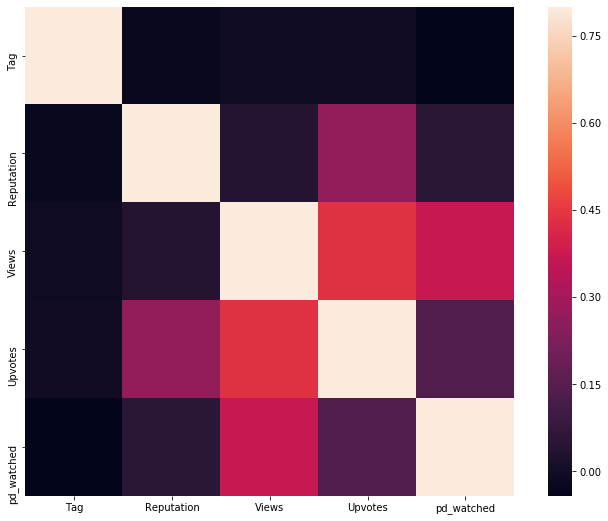

In [5]:
#saleprice correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


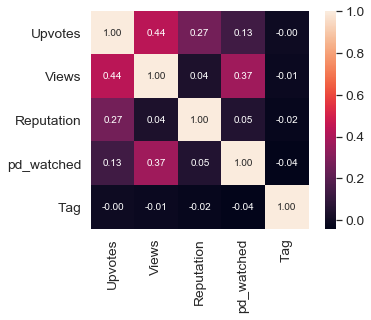

In [6]:
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Upvotes')['Upvotes'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

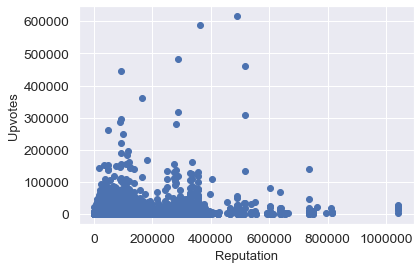

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Reputation'], y = df1['Upvotes'])
plt.ylabel('Upvotes', fontsize=13)
plt.xlabel('Reputation', fontsize=13)
plt.show()

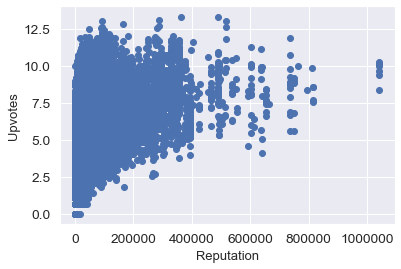

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Reputation'], y = np.log1p(df1['Upvotes']))
plt.ylabel('Upvotes', fontsize=13)
plt.xlabel('Reputation', fontsize=13)
plt.show()

In [9]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df1.columns:
    if df1[i].dtype in numeric_dtypes:
        numeric.append(i)

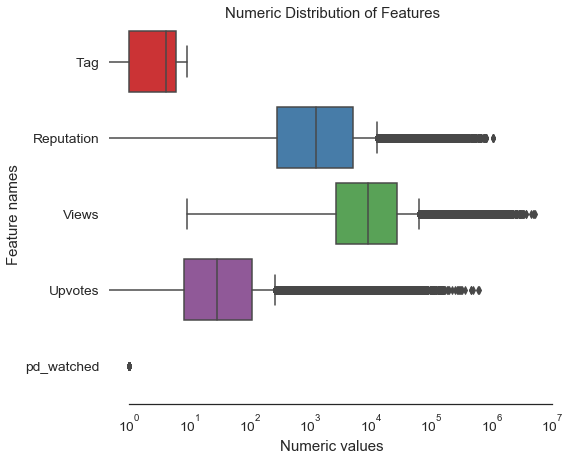

In [10]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df1[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)


In [11]:
"""
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

import dabl
dabl.plot(df1, target_col = 'Upvotes')

"""

"\nplt.rcParams['figure.figsize'] = (15, 6)\nplt.style.use('fivethirtyeight')\n\nimport dabl\ndabl.plot(df1, target_col = 'Upvotes')\n\n"

In [12]:
target=df1["Upvotes"]
df1 = df1.drop(["Upvotes"],axis = 1)

X_train,X_test,y_train,y_test=ms.train_test_split(df1,target,test_size=0.22,random_state=42)

In [13]:
target.shape

(330045,)

In [14]:
df1.shape

(330045, 4)

In [15]:

"""def pcr(X,y,pc):
    ''' Principal Component Regression in Python'''
    ''' Step 1: PCA on input data'''
    # Define the PCA object
    pca = PCA()
    # Preprocessing (1): first derivative
    d1X = savgol_filter(X, 25, polyorder = 5, deriv=1)
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(d1X[:,:])
    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:,:pc]
    ''' Step 2: regression on selected principal components'''
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Fit
    regr.fit(Xreg, y)
    # Calibration
    y_c = regr.predict(Xreg)
    # Cross-validation
    y_cv = cross_val_predict(regr, Xreg, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)
"""

"def pcr(X,y,pc):\n    ''' Principal Component Regression in Python'''\n    ''' Step 1: PCA on input data'''\n    # Define the PCA object\n    pca = PCA()\n    # Preprocessing (1): first derivative\n    d1X = savgol_filter(X, 25, polyorder = 5, deriv=1)\n    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance\n    Xstd = StandardScaler().fit_transform(d1X[:,:])\n    # Run PCA producing the reduced variable Xred and select the first pc components\n    Xreg = pca.fit_transform(Xstd)[:,:pc]\n    ''' Step 2: regression on selected principal components'''\n    # Create linear regression object\n    regr = linear_model.LinearRegression()\n    # Fit\n    regr.fit(Xreg, y)\n    # Calibration\n    y_c = regr.predict(Xreg)\n    # Cross-validation\n    y_cv = cross_val_predict(regr, Xreg, y, cv=10)\n    # Calculate scores for calibration and cross-validation\n    score_c = r2_score(y, y_c)\n    score_cv = r2_score(y, y_cv)\n    # Calculate mean square error for

In [16]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.009,max_iter=200)
lin_reg_1.fit(X_poly, y_train)
# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(X_test))

print(r2_score(y_test, pred_val))


mse = sklearn.metrics.mean_squared_error(y_test, pred_val)
rmse = math.sqrt(mse)
print(rmse)

C:\Users\SaurabhM\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=2.211e-02, with an active set of 13 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\SaurabhM\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 24 iterations, i.e. alpha=1.672e-02, with an active set of 16 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\SaurabhM\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 25 iterations, i.e. alpha=1.546e-02, with an active set of 17 regressors, and the small

0.8307883778815413
1549.0560286644663


In [17]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.009,max_iter=200)
lin_reg_1.fit(X_poly, y_train)
# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(X_test))

print(r2_score(y_test, pred_val))


mse = sklearn.metrics.mean_squared_error(y_test, pred_val)
rmse = math.sqrt(mse)
print(rmse)

0.8161565218339009
1614.6416308340788
